# RSCAM Week One exercises

## Spring pendulum system

In this lab we will explore schemes for numerically integrating a two-dimensional physical system where a mass is connected to the origin via a spring, with a gravitational force pulling it downwards.

We will think of the **position** of the mass as a vector $q\in\mathbb{R}^2$, with its associated **momentum **$p\in\mathbb{R}^2$. The system's total energy (Hamiltonian) function is the sum of kinetic and potential energies:

$$ H(q,p) = \| p \|^2/2 + V_\text{spring}(\vec{0},q) + V_\text{gravity}(q)$$

Where $\|p\|$ is the familiar Euclidean norm, and the potential energy is made up of two terms: the spring connecting it to the origin and gravity pulling it down. We will use the following forms for these potential terms:

$$V_\text{spring}(u,v) :=k_0( \|u-v\|-r_0)^2/2$$
$$V_\text{gravity}(q) := g q_y$$

We have a bunch of constants to play with here:

-  `g` :: the gravitational strength
-  `k_0` :: the strength of the spring (related to the frequency)
-  `r_0` :: the spring _rest length_; the distance at which the energy term is minimized

We may wish to experiment with these parameters to find interesting behaviour, but for now we will code up a simulation of Newtonian physics using Hamilton's equations and this energy function, setting every free parameter to 1.

In [3]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt

It will be useful to have a function that takes as input a point in phase-space $(q,p)$ and outputs $H(q,p)$. This is given below, making use of numpy's `linalg.norm` function to compute the Euclidean norm.

In [5]:
def Get_Energy(q,p):
    
    # Kinetic energy is easy
    ke = np.linalg.norm(p)**2 / 2
    
    # Set constants
    g = 1.0 
    k0 = 1.0 
    r0 = 1.0 
    
    # As gravity only acts in the vertical direction, we define q's vertical component
    q_y = q[1] 
    
    V_spring  = k0* (np.linalg.norm(0 - q) - r0 )**2 /2
    V_gravity = g*q_y
    
    # Total PE is the sum of the terms
    pe = V_spring + V_gravity
    
    
    H = ke + pe 
    
    return H 

Hamilton's equations of motion are

$$\dot{q} = \nabla_p H(q,p)$$
$$\dot{p} = -\nabla_q H(q,p)$$

The term $-\nabla_q H$ is often known as the **force**. 

We can't generally solve these equations exactly, so we'll seek an approximation that's somehow closeby. To approximate a solution we'll need a routine that evaluates the right hand side (rhs) of this ODE. We define this function below:

In [6]:
def ode_rhs(q,p):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0 
    k = 1.0 
    r0 = 1.0 
    
    # dq/dt = p, according to Hamilton's eqns
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    dp_dt[0] = -k * (r-r0) * x/r 
    dp_dt[1] = -k * (r-r0) * y/r - g # [!] Change this line 
    
    return dq_dt, dp_dt 


** [ 1 ] Complete the code in the above routine by filling in ** `dp_dt[1]` **. Don't forget the gravity term!**

You can check that the code is correct below.

We define an initial position and momentum value, and look at the output of `ode_rhs` at that point.

In [7]:
initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

initial_ode_rhs = ode_rhs(initial_q,initial_p)
print('RHS at initial point: ' + str(initial_ode_rhs))
# Should output (array([0.1, 0.2]), array([ 0.00253528, -0.99641564]))

RHS at initial point: (array([0.1, 0.2]), array([ 0.00253528, -0.99641564]))


If you have implemented it correctly, the output of the function should be 
`(array([0.1, 0.2]), array([ 0.00253528, -0.99641564]))`.

The simplest ode integrator is Euler's Method. If we have a system $\dot{z} = f(t,z)$, then Euler's method updates the system by successively running 

$$z(t+h)\leftarrow z(t) + h\, f(t,z)$$

This is implemented as

In [10]:
def Eulers_Method(q,p,t,h):
    
    # Evaluate the rhs
    dq_dt, dp_dt = ode_rhs(q,p)
    
    # Update the state
    qt = q + h*dq_dt  
    pt = p + h*dp_dt 
    tt = t + h 
    
    # Return the new values
    return qt,pt,tt
    

We can then setup a loop to repeatedly step through time until we hit a maximum time `T`. We use a stepsize `h`, and save our trajectory into a python list.

In [11]:
# Set end time T and stepsize h  
T = 25
h = 0.005
Nsteps = int(T / h)

# Make a copy of our initial values so we
# don't accidently overwrite them 
q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

# Initialize our saved trajectory to be blank 
q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj = [] 

# Run the loop 
for n in range(Nsteps):
    q,p,t = Eulers_Method(q,p,t,h)  # Update step
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj = e_traj + [Get_Energy(q,p)] # [!] Change this line 
    
# Make these into numpy arrays
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

**[ 2 ] Edit the code so that the total energy of the system is saved in** `e_traj`**.**

We can then use the plotting class `plt` to plot the output trajectory and energy.

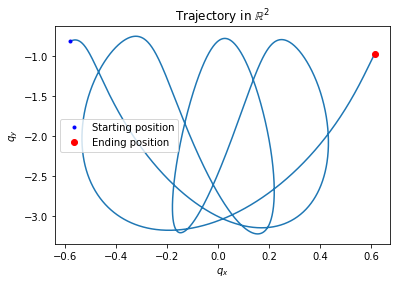

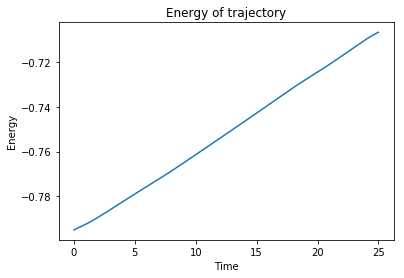

In [12]:
plt.plot( q_traj[:,0], q_traj[:,1]  ) 
plt.plot( q_traj[0,0], q_traj[0,1],'b.',label='Starting position')
plt.plot( q_traj[-1,0], q_traj[-1,1],'ro',label='Ending position')
plt.xlabel('$q_x$')
plt.ylabel('$q_y$') 
plt.legend()
plt.title('Trajectory in $\mathbb{R}^2$')
plt.show()
plt.plot( t_traj, e_traj  ) 
plt.xlabel('Time')
plt.ylabel('Energy') 
plt.title('Energy of trajectory')
plt.show()

As we have seen in lectures, the energy will change over time. The exact solution to Hamiltonian's equations *should* preserve energy, so we can look at this energy change as an error in our integration.

We can quantify this error by looking at the maximum energy change over the whole trjectory, compared to the energy of the starting point.

**[ 3 ] Show that the maximum energy difference over the trajectory  is about `0.088`, where**
$$ \text{Maximum energy difference} = \max_{0\leq t\leq T}\left|H(q(0),p(0)) - H(q(t),p(t))\right| $$


In [13]:
error = []
for n in range(Nsteps):
    # Putting the absolute value of the energy difference in an array
    error.append(abs(Get_Energy(q_traj[0],p_traj[0])-Get_Energy(q_traj[n],p_traj[n])))
max_diff = max(error)
print(max_diff)

0.08834569052735597


With this basic framework we can now experiment with the system.

**[ 4 ] Verify, by plotting or outputting values, that the maximum energy difference has an approximately linear relationship with $h$ when the timestep $h$ is small. Note that it might be beneficial to use a smaller `T` for efficiency's sake (depending on what you're running on).**


**[ 5 ] Change the initial position to be $q(0) = [r_0,0]$ and $p(0) = [0,-1]$, so that $H(q(0),p(0))=0.5$. For `h=0.005`, demonstrate graphically how the maximum energy difference changes in experiments with parameters** 
-  `k_0` **between [0.1,10], with ** `r_0=1` **fixed**
-  `r_0` **between [0.1,10], with ** `k_0=1` **fixed**



[0.001, 0.003, 0.005, 0.01, 0.025, 0.125]
[0.010144023651506906, 0.03087481893430044, 0.05220904083315547, 0.10828624398164988, 0.3017859662715967, 2.300563115443358]


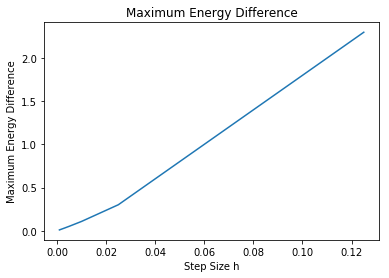

In [14]:
# Question [4]
hs = [0.001,0.003,0.005,0.010,0.025,0.125]
max_diff = []
for stepsize in hs:
    # Set end time T and stepsize h  
    T = 15
    h = stepsize
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.copy(initial_q)
    p = np.copy(initial_p)
    t = initial_t

    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = []
    
    # Initialize maximum difference 
    error = []
    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Eulers_Method(q,p,t,h)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [Get_Energy(q,p)] # [!] Change this line 
        # Putting the absolute value of the energy difference in an array
        error.append(abs(Get_Energy(q_traj[0],p_traj[0])-Get_Energy(q_traj[n],p_traj[n])))
    # Make these into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)
    
    # Get the maximum energy difference for each step size h and putting it into a list
    max_diff.append(max(error))

# ptinting values
print(hs)
print(max_diff)

# plotting h vs Maximum Difference
plt.plot(hs,max_diff)
plt.xlabel('Step Size h')
plt.ylabel('Maximum Energy Difference') 
plt.title('Maximum Energy Difference')
plt.show()

**In the following section, I am defining the same functions again but with more flexibility to include changes in r0 and k0**

In [15]:
# Define anothe Energy Calculation Function that takes k0 and r0 as a input
def Get_Energy_var(q,p,k0,r0):
    
    # Kinetic energy is easy
    ke = np.linalg.norm(p)**2 / 2
    
    # Set constants
    g = 1.0 
    
    # As gravity only acts in the vertical direction, we define q's vertical component
    q_y = q[1] 
    
    V_spring  = k0* (np.linalg.norm(0 - q) - r0 )**2 /2
    V_gravity = g*q_y
    
    # Total PE is the sum of the terms
    pe = V_spring + V_gravity
    
    
    H = ke + pe 
    
    return H 

In [16]:
def ode_rhs_var(q,p,r0,k):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0 
    
    # dq/dt = p, according to Hamilton's eqns
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    dp_dt[0] = -k * (r-r0) * x/r 
    dp_dt[1] = -k * (r-r0) * y/r - g 
    
    return dq_dt, dp_dt 

In [20]:
# Euler's  Method with flexible r0 and k0
def Eulers_Method_var(q,p,t,h,r0,k0):
    
    # Evaluate the rhs
    dq_dt, dp_dt = ode_rhs_var(q,p,r0,k0)
    
    # Update the state
    qt = q + h*dq_dt  
    pt = p + h*dp_dt 
    tt = t + h 
    
    # Return the new values
    return qt,pt,tt
    

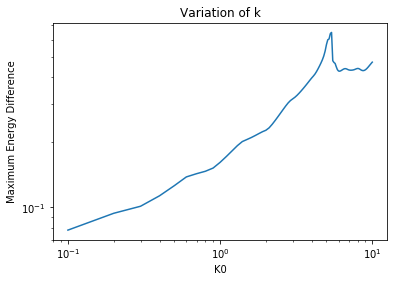

In [21]:
# Question 5
r0 = 1
initial_q = np.array([r0,0])
initial_p = np.array([0,-1])

k_0 = np.linspace(0.1,10,100)
max_diff_vark = []

for k0 in k_0: 
    # Set end time T and stepsize h  
    T = 25
    h = 0.005
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.copy(initial_q)
    p = np.copy(initial_p)
    t = initial_t

    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = []

    # Initialize maximum difference and the maximum for each step
    error = []
    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Eulers_Method_var(q,p,t,h,r0,k0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [Get_Energy_var(q,p,k0,r0)] # [!] Change this line 
        # Putting the absolute value of the energy difference in an array
        error.append(abs(Get_Energy_var(q_traj[0],p_traj[0],k0,r0)-Get_Energy_var(q_traj[n],p_traj[n],k0,r0)))
    # Make these into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)

    # Get the maximum energy difference for each step size h and putting it into a list
    max_diff_vark.append(max(error))


# plotting h vs Maximum Difference
plt.loglog(k_0,max_diff_vark)
plt.xlabel('K0')
plt.ylabel('Maximum Energy Difference') 
plt.title('Variation of k')
plt.show()

In [22]:
# Question 5
r_0 = np.linspace(0.1,10,100)

initial_p = np.array([0,-1])
k0 = 1
max_diff_varr = []

for r0 in r_0:
    initial_q = np.array([r0,0])
    # Set end time T and stepsize h  
    T = 25
    h = 0.005
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.copy(initial_q)
    p = np.copy(initial_p)
    t = initial_t

    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = []

    # Initialize maximum difference and the maximum for each step
    error = []
    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Eulers_Method_var(q,p,t,h,r0,k0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [Get_Energy_var(q,p,k0,r0)] # [!] Change this line 
        # Putting the absolute value of the energy difference in an array
        error.append(abs(Get_Energy_var(q_traj[0],p_traj[0],k0,r0)-Get_Energy_var(q_traj[n],p_traj[n],k0,r0)))
    # Make these into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)

    # Get the maximum energy difference for each step size h and putting it into a list
    max_diff_varr.append(max(error))
    


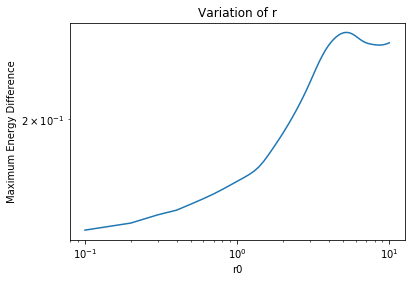

In [27]:
# plotting h vs Maximum Difference
plt.loglog(r_0,max_diff_varr)
plt.xlabel('r0')
plt.ylabel('Maximum Energy Difference') 
plt.title('Variation of r')
plt.show()

***

More exotic higher-order schemes can be used to integrate the equations to higher accuracy. For example, consider the explicit midpoint method:

##### Explicit midpoint method:

For a system 
$$ \dot{z} = f(t,z) $$
we use
$$ \left| \begin{array}{rcl} 
\qquad z(t+h/2)&\leftarrow&z(t) + (h/2)\, f(t,z(t))\\
z(t+h)&\leftarrow&z(t) + h\, f(t+h/2, z(t+h/2))\\
\end{array}\right.$$

**[ 6 ] Code a version of the explicit midpoint algorithm below.**

In [30]:
def Explicit_Midpoint_Method(q,p,t,h):
    
    # Get the midpoint
    mid = h/2
    # Evaluate the rhs at the midpoint
    qt, pt, tt = Eulers_Method(q,p,t,mid)
    dq_dt, dp_dt = ode_rhs(qt,pt)
    # Update the state
    qt = q + h*dq_dt  
    pt = p + h*dp_dt 
    tt = t + h 
    
    # Return the new values
    return qt,pt,tt
    

We can run it the same way we ran the previous algorithm. However, note that now the energy difference is significantly smaller.

In [31]:
initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

T = 25
h = 0.005
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj = [] 

for n in range(Nsteps):
    q,p,t = Explicit_Midpoint_Method(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj = e_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

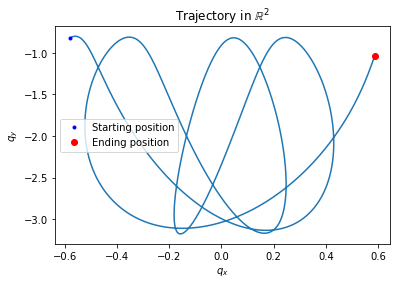

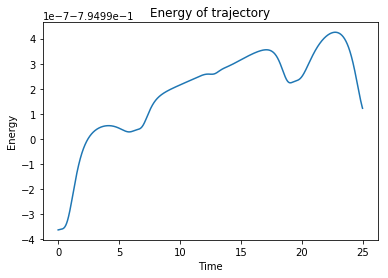

In [32]:
plt.plot( q_traj[:,0], q_traj[:,1]  ) 
plt.plot( q_traj[0,0], q_traj[0,1],'b.',label='Starting position')
plt.plot( q_traj[-1,0], q_traj[-1,1],'ro',label='Ending position')
plt.xlabel('$q_x$')
plt.ylabel('$q_y$') 
plt.legend()
plt.title('Trajectory in $\mathbb{R}^2$')
plt.show()
plt.plot( t_traj, e_traj  ) 
plt.xlabel('Time')
plt.ylabel('Energy') 
plt.title('Energy of trajectory')
plt.show()

 **[ 7 ] Verify, by plotting or outputting values, that the maximum energy difference has an approximately quadratic relationship with $h$ when the timestep $h$ is small.**

[0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
[0.003294617651293019, 0.003955160378509848, 0.004616392170909256, 0.0052785474642547126, 0.005940989707859279, 0.006604158396357196]


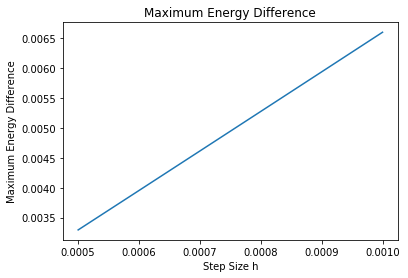

In [38]:
# Question [7]
hs = [0.0005,0.0006,0.0007,0.0008,0.0009,0.001]
# we can try smaller step sizes and many more to prove the quadratic behavior but this would take time
# hs = np.linspace(0.0001,0.1,20)
max_diff = []
for stepsize in hs:
    # Set end time T and stepsize h  
    T = 10
    h = stepsize
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.copy(initial_q)
    p = np.copy(initial_p)
    t = initial_t

    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = []
    
    # Initialize maximum difference 
    error = []
    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Eulers_Method(q,p,t,h)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [Get_Energy(q,p)] # [!] Change this line 
        # Putting the absolute value of the energy difference in an array
        error.append(abs(Get_Energy(q_traj[0],p_traj[0])-Get_Energy(q_traj[n],p_traj[n])))
    # Make these into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)
    
    # Get the maximum energy difference for each step size h and putting it into a list
    max_diff.append(max(error))

# ptinting values
print(hs)
print(max_diff)

# plotting h vs Maximum Difference
plt.plot(hs,max_diff)
plt.xlabel('Step Size h')
plt.ylabel('Maximum Energy Difference') 
plt.title('Maximum Energy Difference')
plt.show()

## Double pendulum

We may extend our system to include a second particle, also affected by gravity, and include an additional spring term between particle 1 and 2. Though this seems like a relatively trivial change, the system will become much more complex.

We think of our position vector $q$ as holding the position data for the whole system, so $q=[q_1,q_2]=[q_{1,x},q_{1,y},q_{2,x},q_{2,y}]$, and similarly for $p$. We can write the new energy function as

$$ H(q,p) = \| p_1 \|^2/2 + \| p_2 \|^2/2 + V_\text{spring_1}(0,q_1)+ V_\text{spring_2}(q_1,q_2) + V_\text{gravity}(q_1)+ V_\text{gravity}(q_2)$$

where 

$$V_\text{spring_1}(u,v) :=k_1( \|u-v\|-r_1)^2/2$$
$$V_\text{spring_2}(u,v) :=k_2( \|u-v\|-r_2)^2/2$$
$$V_\text{gravity}(q) := g q_y$$

As before, we shall set all constants equal to one.

 **[ 8 ] Code the **`Get_Energy`** and ** `ode_rhs` ** functions for the double pendulum example.**

In [44]:
def Get_Energy(q,p): 
    
    g = 1.0 
    k1 = 1.0 
    k2 = 1.0 
    r1 = 1.0 
    r2 = 1.0  
    
    # Kinetic energy
    ke = (np.linalg.norm(p[0:2])**2 / 2) + (np.linalg.norm(p[2:4])**2 / 2)

    # As gravity only acts in the vertical direction, we define q's vertical component
    q_y1 = q[1]
    q_y2 = q[3]
    
    V_spring1  = k1* (np.linalg.norm(0 - q[0:2]) - r1 )**2 /2
    V_gravity1 = g*q_y1
    
    V_spring2  = k2* (np.linalg.norm(q[0:2] - q[2:4]) - r2 )**2 /2
    V_gravity2 = g*q_y2
    
    # Total PE is the sum of the terms
    pe = V_spring1 + V_gravity1 + V_spring2 + V_gravity2
    
    
    H = ke + pe 
    
    return H 

In [68]:
def ode_rhs(q,p):
    
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    g = 1.0 
    k1 = 1.0 
    k2 = 1.0 
    r1 = 1.0 
    r2 = 1.0  
    
    # Your code here 
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    dq_dt[2] = p[2]
    dq_dt[3] = p[3]
    
    r_q1 = np.linalg.norm(-q[0:2])
    r_q1q2 = np.linalg.norm(q[0:2]-q[2:4])

    dp_dt[0]= -k1*(r_q1-r1)*q[0]/r_q1 - k2*(r_q1q2-r2)*(q[0]-q[2])/r_q1q2
    dp_dt[1]= -k1*(r_q1-r1)*q[1]/r_q1 - k2*(r_q1q2-r2)*(q[1]-q[3])/r_q1q2- g
    dp_dt[2]= - k2*(r_q1q2-r2)*(q[2]-q[0])/r_q1q2
    dp_dt[3]= - k2*(r_q1q2-r2)*(q[3]-q[1])/r_q1q2 - g
    
    return dq_dt, dp_dt 

You can check the function outputs below:

In [69]:
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)
print('Energy at initial point: ' + str(initial_energy))
print('ODE_RHS at initial point: ' + str(initial_ode_rhs))

Energy at initial point: -2.172754357656391
ODE_RHS at initial point: (array([0.1, 0.2, 0.3, 0.4]), array([ 0.0821041 , -0.72374123, -0.09253563, -1.3701425 ]))


The correct output is

`Energy at initial point: -2.1727543576563906`

`ODE_RHS at initial point: (array([0.1, 0.2, 0.3, 0.4]), array([ 0.0821041 , -0.72374123, -0.09253563, -1.3701425 ]))`

We can run the same looping code as before. Note that our explicit midpoint method code will still work here, as we have vectorized everything.

In [70]:
T = 50
h = 0.05
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj = [] 

for n in range(Nsteps):
    q,p,t = Explicit_Midpoint_Method(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj = e_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 


 **[ 9 ] Plot the trajectory for the two particles in the $(x,y)$ plane. Plot them on the same axis, with a seperate curve for each particle.**

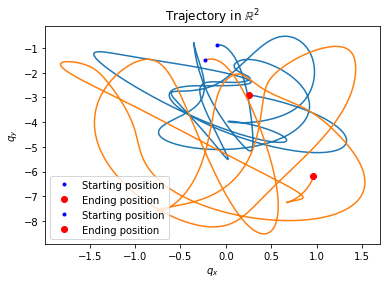

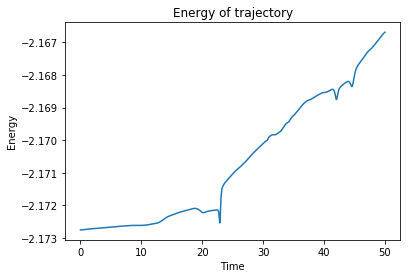

In [71]:
plt.plot( q_traj[:,0], q_traj[:,1]  ) 
plt.plot( q_traj[0,0], q_traj[0,1],'b.',label='Starting position')
plt.plot( q_traj[-1,0], q_traj[-1,1],'ro',label='Ending position')

plt.plot( q_traj[:,2], q_traj[:,3]  ) 
plt.plot( q_traj[0,2], q_traj[0,3],'b.',label='Starting position')
plt.plot( q_traj[-1,2], q_traj[-1,3],'ro',label='Ending position')

plt.xlabel('$q_x$')
plt.ylabel('$q_y$') 
plt.legend()
plt.title('Trajectory in $\mathbb{R}^2$')
plt.show()
plt.plot( t_traj, e_traj  ) 
plt.xlabel('Time')
plt.ylabel('Energy') 
plt.title('Energy of trajectory')
plt.show()



###### Optional

-  Try making the one stiffness parameter (`k_1` or `k_2`) significantly larger than the other in the two pendulum example and look at the output trajectory. What kind of system does this approximate in the large $k$ limit?
-  What happens if you add a third particle to the system, with a spring potential between particles 2 and 3 and a spring potential between 3 and the origin?
-  Experiment with using the `plt` command to make animations. Matplotlib can make high-quality animations to be saved as gifs or movies, for use in talks and other presentations (hint: websites). Such animations can also help you make sense of what is going on better than a static trajectory can.
-  Implement the Runge-Kutta 4 scheme (see https://en.wikipedia.org/wiki/Runge-Kutta_methods#The_Runge-Kutta_method ) in place of the explicit midpoint scheme and compare its accuracy.
-  Instead of the spring potential, we may consider other interaction potentials such as the Morse potential ( https://en.wikipedia.org/wiki/Morse_potential ). Swap out the $V_\text{spring}$ function for
$$V_\text{Morse}(u,v) = (1-\exp[ -k_0(\|u-v\|-r_0)])^2$$ This more accurately simulates interatomic potentials. At small energies it should behave just similarly to the spring, but at high energies...